# Sentimental Analysis using NLTK

# Overview

    In this kernel, I use various methods and try to predict the users sentiment from reviews about Clash of Clan game.

    Before Analysing the data, preprocess it. For Preprocessing the data, I use NLTK - Natural Language Tool Kit

    NLTK is a powerful Python package that provides a set of diverse natural languages algorithms. It is free, opensource, easy to use, large community, and well documented. NLTK consists of the most common algorithms such as tokenizing, part-of-speech tagging, stemming, sentiment analysis, topic segmentation, and named entity recognition. NLTK helps the computer to analysis, preprocess, and understand the written text.

    After processing it,  analyze the data and visualize it to reach more insights. Then, I applied different ML models for sentimental analysis and compared them from various aspects.

# Importing required modules and reading the Dataset

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import nltk

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, plot_confusion_matrix

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

sns.set(color_codes=True)
sns.set_style('whitegrid')
pd.set_option('display.width', 2000)
np.set_printoptions(linewidth=2000)
pd.set_option('display.max_columns', 25)

In [2]:
data = pd.read_csv("new.csv")
data.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,gp:AOqpTOHytC1c2CwMwsZCphaZXcVfNb43xSKz3ylZjwB...,Cheruangdibo Chawang,https://play-lh.googleusercontent.com/a/AATXAJ...,At first sight i considered coc as my favourit...,1,0,14.426.4,2022-03-20 18:24:28,NaN,NaN
1,gp:AOqpTOGn-r7w7MC1i3txNUR7uDnUk2I8cgrBxncrmfU...,Aman Zaheer,https://play-lh.googleusercontent.com/a/AATXAJ...,OWj,5,0,NaN,2022-03-20 18:22:49,NaN,NaN
2,gp:AOqpTOGA3rdUUwZ1kUi9MYEtxY9gvgwN5Mcf3DwvtCR...,Kanishk Krish,https://play-lh.googleusercontent.com/a-/AOh14...,It's a great game with great concept but it wo...,5,0,14.426.4,2022-03-20 18:21:10,NaN,NaN
3,gp:AOqpTOH17QoOX9H0JB6DjUhRMU7WdwbiJiDlYd_StGY...,Vindhyachal Sharma,https://play-lh.googleusercontent.com/a-/AOh14...,It's a good game but when it comes to help and...,3,0,14.426.1,2022-03-20 18:20:07,NaN,NaN
4,gp:AOqpTOGJN-MvlrgJ7tiYG-qSCTYKD6zXXmSWrCwkk-C...,Krishna Kumar,https://play-lh.googleusercontent.com/a-/AOh14...,"Hey COC Team, Can you add an update where we c...",5,3,14.426.4,2022-03-20 18:17:10,NaN,NaN


From our dataset, we require "content" and "score" columns to do analysis

In [3]:
final_data = data[['content','score']]
final_data.head(5)

,content,score
0,At first sight i considered coc as my favourit...,1
1,OWj,5
2,It's a great game with great concept but it wo...,5
3,It's a good game but when it comes to help and...,3
4,"Hey COC Team, Can you add an update where we c...",5


In [4]:
final_data.shape

(27860, 2)

There are 27860 rows and 2 columns

# Data Preprocessing and Visualization

Checking for null values

In [5]:
final_data.isnull().sum()

content    1
score      0
dtype: int64

We have 1 null value for content and 0 for score.

Drop the empty rows

In [6]:
final_data = final_data.dropna()

Checking for null again and return in bool

In [7]:
final_data.isnull().any()

content    False
score      False
dtype: bool

In this data, we have five scores for the sentiments namely,
    1 - Negative 
    2 - Somewhat Negative
    3 - Neutral
    4 - Somewhat Positive
    5 - Positive

In [8]:
final_data.score.value_counts()

5    20780
1     2696
4     2590
3     1244
2      549
Name: score, dtype: int64

    Now we could find that there are 23370 (20780 + 2590) Positive Reviews and 1244 Neutral and 3245 (2696 + 549) Negative Reviews. We find approx 80% of review are positive ones and remaining ae negative and neutral ones. This could be visualized and understood more clearly with the help of a countplot in the seaborn library.

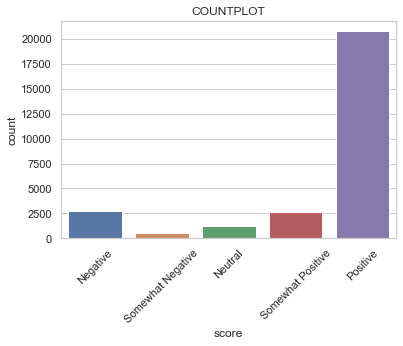

In [9]:
sns.countplot(final_data['score'])
plt.xticks([0,1,2,3,4],['Negative','Somewhat Negative','Neutral','Somewhat Positive','Positive'], rotation = 45)
plt.title("COUNTPLOT")
plt.show()

# Text Analysis operations using NLTK

    We know that human readable text may have punctuations, conjuctions, articles and so many. This will become confused for the machines to classify the sentiments. We need to remove those punctuations and stopwords which donot add any sentiments to the text.

# Removing Punctuation mark from the reviews

In [10]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/mani/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
def remove_punctuation(text):
    import string
    a=[word for word in text if word not in string.punctuation]
    return ''.join(a)
final_data['content'] = final_data['content'].apply(remove_punctuation)

# Tokenizing

    By tokenizing, you can conveniently split up text by word or by sentence. This will allow you to work with smaller pieces of text that are still relatively coherent and meaningful. It is first step in turning unstructured data into structured data, which is easier to analyze.

    Here’s the two types of tokenization:
        1)Tokenizing by word
        2)Tokenizing by sentence
        
        ## from nltk.tokenize import word_tokenize, sent_tokenize

# Filtering Stop Words

In [12]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/mani/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
def remove_stopword(text):
    stopword=nltk.corpus.stopwords.words('english')
    stopword.remove('not')
    a=[word for word in nltk.word_tokenize(text) if word not in stopword]
    return ' '.join(a)
final_data['content'] = final_data['content'].apply(remove_stopword)

In [14]:
final_data.head(20)

,content,score
0,At first sight considered coc favourite game i...,1
1,OWj,5
2,Its great game great concept would great added...,5
3,Its good game comes help support supercell lin...,3
4,Hey COC Team Can add update turn onoff spectat...,5
5,Bachpan ki yaadein main hain,5
6,Good game,5
7,Nice ❤️,5
8,nice favourite time taken game ❤️,5
9,Love game,5


    In reviews there may be many text with unwanted and meaningless words, so we need to filter them out.
    From the above, we could see words like "Owj" and "Op" which doesn't make any sense. To filter these, we implement the below code.

# Filtering meaningless words

In [15]:
nltk.download('words')

[nltk_data] Downloading package words to /Users/mani/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [16]:
words = set(nltk.corpus.words.words())

def remove_meaningless_words(text):
    return(" ".join(word for word in nltk.word_tokenize(text) \
         if word.lower() in words or not word.isalpha()))

final_data['content'] = final_data['content'].apply(remove_meaningless_words)

In [17]:
final_data.head(20)

,content,score
0,At first sight considered game fate pro push r...,1
1,,5
2,Its great game great concept would great added...,5
3,Its good game comes help support linked always...,3
4,Hey Team Can add update turn option When ON cl...,5
5,main hain,5
6,Good game,5
7,Nice ❤️,5
8,nice time taken game ❤️,5
9,Love game,5


Now we can see the meaningless words have been removed and replaced with empty strings
We need to drop those rows.

In [18]:
final_data['content'].replace("", np.nan, inplace= True)

In [19]:
final_data = final_data.dropna()

In [20]:
final_data.shape

(25313, 2)

Previously there was 27860 rows and now after processing the text we have 25313 rows.
Now lets create WordCloud

# WordCloud

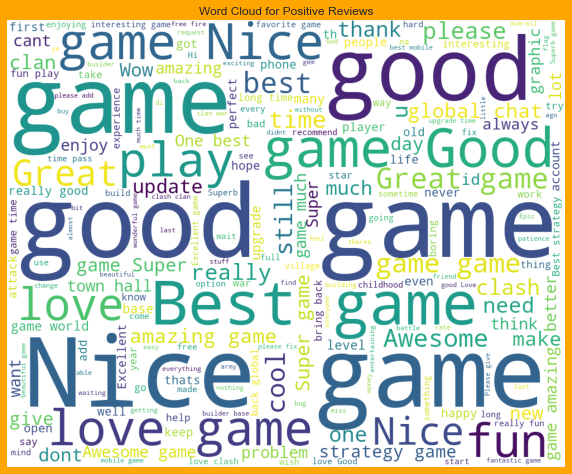

In [21]:
words = '' 
stopwords = set(STOPWORDS) 
  
positive_data = final_data[(final_data["score"]== 4) | (final_data["score"]== 5)]
# iterate through the csv file 
for val in positive_data.content: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split()  
      
    words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 1000, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (10, 10), facecolor = "orange") 
plt.imshow(wordcloud) 
plt.axis("off")  
plt.title("Word Cloud for Positive Reviews")
plt.show() 

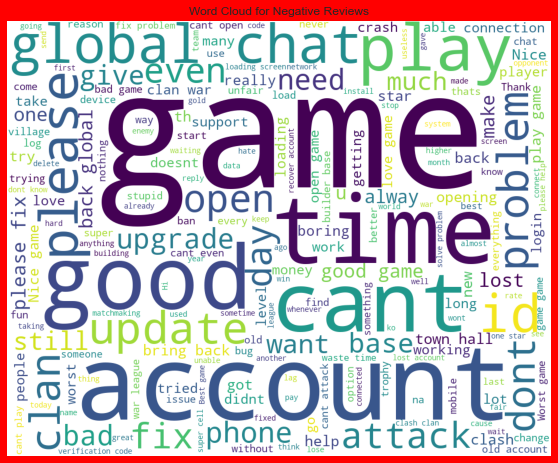

In [22]:
words = '' 
stopwords = set(STOPWORDS) 
  
negative_data = final_data[(final_data["score"]== 1) | (final_data["score"]== 2)]
# iterate through the csv file 
for val in negative_data.content: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split()  
      
    words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 1000, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (10, 8), facecolor = "Red") 
plt.imshow(wordcloud) 
plt.axis("off")  
plt.title("Word Cloud for Negative Reviews")
plt.show() 

# Precentage of reviews for each sentiment score

In [23]:
var1 = final_data.groupby('score').count()['content'].reset_index().sort_values(by='content',ascending=False)
sns.set_style("white")
sns.set_palette("Set2")
var1.style.background_gradient()

,score,content
4,5,18737
0,1,2497
3,4,2407
2,3,1163
1,2,509


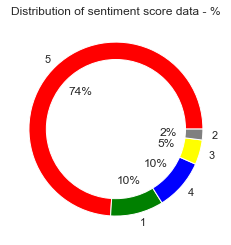

In [24]:
# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.8, color='white')

# Give color names
plt.pie(var1.content, labels=var1.score.unique(), colors=['red','green','blue','yellow','grey'], autopct='%.0f%%')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Distribution of sentiment score data - %')

# Show the graph
plt.show()


    From the above chart, we could see around 74% for positive reviews only. While building and evaluating the model there are more chances for our data to overfit. 
    Therefore, we choose only few data's from final dataset to overcome the overfit problem.

# To avoid overfitting

    Randomly selecting 25% of positive reviews only. Other sentiment data have only few rows and we are keeping the count as it is.

In [25]:
positive_data = final_data[(final_data["score"]== 5)]
pos_data = positive_data.sample(frac=0.25)
len(pos_data)

4684

Dropping the entire rows of positive reviews( Sentiment score = 5) and appending only 25% of them with the final_dataset

In [26]:
final_data.drop(final_data.index[final_data['score'] == 5], inplace=True)

In [27]:
new_data = pd.concat([final_data,pos_data])
len(new_data)

11260

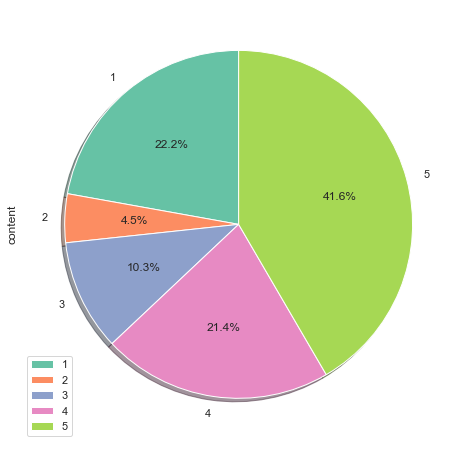

In [28]:
new_data.groupby(['score']).count().plot(kind='pie', y='content', 
                                           shadow = True,  startangle=90, figsize=(14,8), autopct='%1.1f%%')
plt.show()

# Model Building

    Feature Generation using TF-IDF Reference from : 

    In Term Frequency(TF), you just count the number of words occurred in each document. The main issue with this Term Frequency is that it will give more weight to longer documents. Term frequency is basically the output of the BoW model.

    IDF(Inverse Document Frequency) measures the amount of information a given word provides across the document. IDF is the logarithmically scaled inverse ratio of the number of documents that contain the word and the total number of documents.

    TF-IDF(Term Frequency-Inverse Document Frequency) normalizes the document term matrix. It is the product of TF and IDF. Word with high tf-idf in a document, it is most of the times occurred in given documents and must be absent in the other documents. So the words must be a signature word.

Reference from : https://www.datacamp.com/community/tutorials/text-analytics-beginners-nltk 

In [29]:
tf=TfidfVectorizer(ngram_range=(1,2))
transform_X= tf.fit_transform(new_data['content'])
X_train, X_test, y_train, y_test = train_test_split(
    transform_X, new_data['score'], test_size=0.3, random_state=123)

# Logistic Regression

In [30]:
log_model = LogisticRegression(solver='liblinear', random_state = 0)
log_model.fit(X_train, y_train)
log_training_predictions = log_model.predict(X_train)
log_testing_predictions = log_model.predict(X_test)

log_training_score = accuracy_score(y_train, log_training_predictions)
log_testing_score = accuracy_score(y_test, log_testing_predictions)

print(f'Training Accuracy Score is ' + '{:.2f}'.format(log_training_score*100) + '%\n\n Testing Accuracy Score is ' + '{:.2f}'.format(log_testing_score*100) + '%')

Training Accuracy Score is 66.04%

 Testing Accuracy Score is 53.20%


# Multinomial Naive Bayes classifier 

In [31]:
mb_model = MultinomialNB().fit(X_train, y_train)
mb_training_predictions = mb_model.predict(X_train)
mb_testing_predictions = mb_model.predict(X_test)

mb_training_score = accuracy_score(y_train, mb_training_predictions)
mb_testing_score = accuracy_score(y_test, mb_testing_predictions)

print(f'Training Accuracy Score is ' + '{:.2f}'.format(mb_training_score*100) + '%\n\n Testing Accuracy Score is ' + '{:.2f}'.format(mb_testing_score*100) + '%')

Training Accuracy Score is 62.88%

 Testing Accuracy Score is 51.75%


# Support Vector Machine model

In [32]:
svm_model = SVC().fit(X_train,y_train)
svm_training_predictions = svm_model.predict(X_train)
svm_testing_predictions = svm_model.predict(X_test)

svm_training_score = accuracy_score(y_train, svm_training_predictions)
svm_testing_score = accuracy_score(y_test, svm_testing_predictions)

print(f'Training Accuracy Score is ' + '{:.2f}'.format(svm_training_score*100) + '%\n\n Testing Accuracy Score is ' + '{:.2f}'.format(svm_testing_score*100) + '%')

Training Accuracy Score is 79.41%

 Testing Accuracy Score is 52.96%


# Plot Confusion Matrix

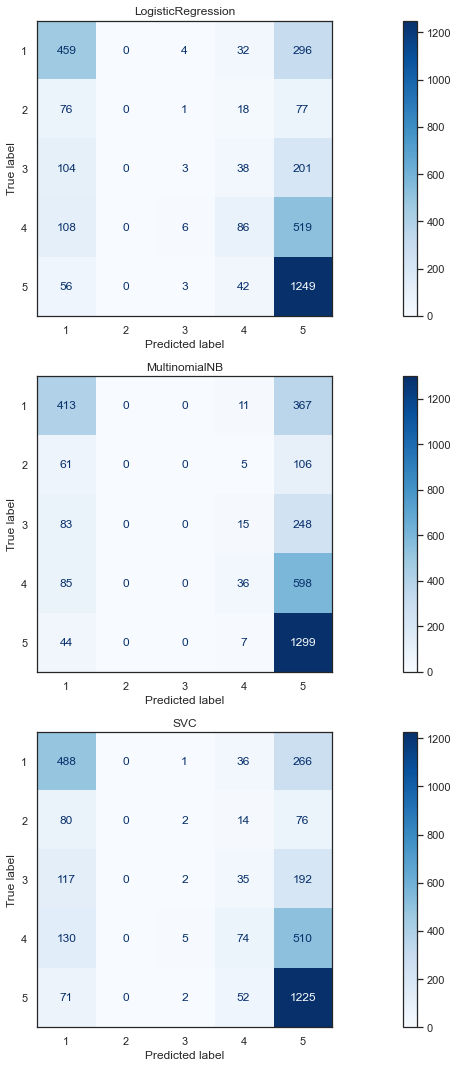

In [33]:
classifiers = [log_model, mb_model,svm_model]
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20,15))

for cls, ax in zip(classifiers, axes.flatten()):
    plot_confusion_matrix(cls, 
                          X_test, 
                          y_test, 
                          ax=ax, 
                          cmap='Blues')
    ax.title.set_text(type(cls).__name__)
plt.tight_layout()  
plt.show()

# Conclusion:

We can observed that both logistic regression and linear support vector model performing well compared to Naive Bayes Classifier.

Furthur imrpovements can be done using Neural Network Algoirthms - CNN, RNN